<a id='top'></a>
<h1 style="font-family:Bahnschrift Condensed;text-align:center; font-size:240%;">Projet Deep Learning : Reconnaissance des Animaux Domestiques</h1>
<h1 style="font-family:Bahnschrift Condensed;text-align:center; font-size:140%;">Classification multi-classes via CNN</h1>

<div style="text-align:center;">
    <img src="https://media.licdn.com/dms/image/v2/C4E0BAQGYBmRCN7M_JA/company-logo_200_200/company-logo_200_200/0/1630581857994?e=2147483647&v=beta&t=e4N2KtKFW8ieFFhgkPwXPqZYxpGDW_pZLRnXXs_ofko" style="width:30%; height:auto;" alt="Logo RIM AI">
</div>

<p style="font-family:Bahnschrift Condensed;font-size:120%; text-align:center;">
    - <strong>23231. EL Moustapha JIDDOU</strong><br>
    - <strong>23084. Yahya Mohamed</strong><br>
    - <strong>SID45</strong> <br>
</p>

<div align="center">
    <span style="font-family:Bahnschrift Condensed;font-size:40px"><b>Section 1: Compréhension du Problème</b></span>
</div>

<h3 style="font-family:Bahnschrift Condensed;text-align:left; font-size:150%;">1. Contexte du Projet</h3>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
Ce projet vise à développer une solution de reconnaissance visuelle pour classifier automatiquement des images d’animaux domestiques issus d’environnements naturels. L’objectif principal est d’exploiter un réseau de neurones convolutionnel (CNN) pour distinguer plusieurs espèces telles que chiens, chats, lapins.
</p>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
<strong>Problématique principale</strong> : Peut-on identifier correctement l’espèce d’un animal domestique à partir de photos prises en milieu réel ?
</p>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
<strong>Problématiques secondaires</strong> :
<ul>
    <li>Quelle architecture CNN offre la meilleure performance pour cette tâche ?</li>
    <li>Quelles techniques d’augmentation de données améliorent la robustesse du modèle ?</li>
    <li>Comment gérer la variabilité des conditions d’éclairage et des arrière-plans dans les images ?</li>
</ul>
</p>

<h3 style="font-family:Bahnschrift Condensed;text-align:left; font-size:150%;">2. Hypothèses et Méthodologie</h3>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
Nous postulons qu’un modèle CNN, entraîné sur un dataset diversifié d’images naturelles d’animaux domestiques, pourra extraire des caractéristiques discriminantes pour une classification précise. Pour vérifier cette hypothèse, nous procéderons de la manière suivante :
</p>
<ul style="font-family:Bahnschrift Condensed; font-size:100%; text-align:left;">
    <li>Prétraitement et augmentation des données afin d’enrichir et de normaliser le dataset.</li>
    <li>Conception et entraînement d’un modèle CNN adapté.</li>
    <li>Ajustement des hyperparamètres pour optimiser la performance du modèle.</li>
    <li>Évaluation du modèle via des métriques telles que la précision, le recall et le F1-score.</li>
</ul>

<h3 style="font-family:Bahnschrift Condensed;text-align:left; font-size:150%;">3. Données Utilisées</h3>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
Les données proviennent du dataset <a href="https://huggingface.co/datasets/rokmr/pets">“Pets” sur Hugging Face</a>, qui regroupe des images naturelles d’animaux domestiques (chiens, chats, lapins). Le dataset est pré-divisé en ensembles d’entraînement et de test, facilitant ainsi la mise en œuvre d’une classification supervisée.
</p>

<h3 style="font-family:Bahnschrift Condensed;text-align:left; font-size:150%;">4. Variables et Description des Données</h3>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
Les principales variables sont :
</p>
<ul style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
    <li><strong>Image</strong> : Fichier image (JPG/PNG) représentant un animal domestique.</li>
    <li><strong>Label</strong> : Étiquette indiquant l’espèce (par exemple, chien, chat, lapin).</li>
</ul>

<h3 style="font-family:Bahnschrift Condensed;text-align:left; font-size:150%;">5. Objectif Final</h3>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
L’objectif est de développer et déployer un modèle CNN performant capable de classifier avec précision les images d’animaux domestiques, tout en offrant une analyse détaillée des performances du modèle.
</p>

<h3 style="font-family:Bahnschrift Condensed;text-align:left; font-size:150%;">6. Architecture du Modèle CNN</h3>

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
Nous envisageons d’expérimenter différentes architectures, incluant des modèles construits from scratch et des approches de transfert de learning (ex.: VGG16, ResNet, Inception) pour identifier la solution optimale.
</p>

<h3 style="font-family:Bahnschrift Condensed;text-align:left; font-size:150%;">7. Importation des Bibliothèques</h3>

In [1]:
# 1. Importer les bibliothèques nécessaires
import os
import shutil
import time
import random
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, image
from tensorflow.keras.callbacks import EarlyStopping
from icrawler.builtin import GoogleImageCrawler
from icrawler import ImageDownloader
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
# Define search queries and parameters
search_queries = ['dog', 'cat', 'rabbit']
limit_per_query = 300
output_directory = 'animal_images'

# Unsplash API Access Key (replace with your own from https://unsplash.com/developers)
UNSPLASH_ACCESS_KEY = '0n0ZOeFbScbz7mCJEoVADFa-2LGO_TO3y0P5McTlMO8'  # Replace with your Unsplash Access Key

# Create main output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Function to download images using icrawler
def download_images_icrawler(query, limit, output_dir):
    try:
        # Create query-specific directory
        query_dir = os.path.join(output_dir, query)
        if not os.path.exists(query_dir):
            os.makedirs(query_dir)

        # Custom downloader to ensure JPG and avoid duplicates
        class CustomDownloader(ImageDownloader):
            def get_filename(self, task, default_ext='jpg'):
                filename = super().get_filename(task, default_ext)
                return filename if filename.endswith('.jpg') else filename + '.jpg'

        # Initialize crawler with optimizations
        crawler = GoogleImageCrawler(
            downloader_cls=CustomDownloader,
            storage={'root_dir': query_dir},
            downloader_threads=4,
            parser_threads=2,
            feeder_threads=1,
            log_level=20  # INFO level for debugging
        )

        # Crawl images with filters and increased timeout
        crawler.crawl(
            keyword=query,
            max_num=limit,
            file_idx_offset=0,
            min_size=(200, 200),
            max_size=(5000, 5000),
            overwrite=False,
            timeout=10,
            max_retry=3
        )

        # Count downloaded images
        num_images = len([f for f in os.listdir(query_dir) if f.endswith('.jpg')])
        print(f"Downloaded {num_images} images for {query} using icrawler")
        return num_images
    except Exception as e:
        print(f"Error with icrawler for {query}: {str(e)}")
        return 0

# Function to download images using Unsplash API as a fallback
def download_images_unsplash(query, limit, output_dir):
    try:
        # Create query-specific directory
        query_dir = os.path.join(output_dir, query)
        if not os.path.exists(query_dir):
            os.makedirs(query_dir)

        # Initialize Unsplash API
        headers = {'Authorization': f'Client-ID {UNSPLASH_ACCESS_KEY}'}
        url = 'https://api.unsplash.com/search/photos'
        count = 0
        page = 1
        per_page = 30  # Max per page for Unsplash

        while count < limit:
            params = {
                'query': query,
                'page': page,
                'per_page': per_page,
                'orientation': 'landscape'
            }

            # Make API request
            response = requests.get(url, headers=headers, params=params)
            if response.status_code != 200:
                print(f"Unsplash API error for {query}: {response.status_code}")
                break

            photos = response.json().get('results', [])
            if not photos:
                print(f"No more images available for {query} on Unsplash")
                break

            for photo in photos:
                if count >= limit:
                    break
                try:
                    img_url = photo['urls']['regular']
                    filename = os.path.join(query_dir, f"{query}_{count}.jpg")
                    img_response = requests.get(img_url, stream=True)
                    if img_response.status_code == 200:
                        with open(filename, 'wb') as f:
                            img_response.raw.decode_content = True
                            shutil.copyfileobj(img_response.raw, f)
                        count += 1
                except Exception as e:
                    print(f"Error downloading Unsplash image {count} for {query}: {str(e)}")

            page += 1
            time.sleep(1)  # Respect rate limits

        print(f"Downloaded {count} images for {query} using Unsplash")
        return count
    except Exception as e:
        print(f"Error with Unsplash for {query}: {str(e)}")
        return 0

# Loop through each query and attempt downloading
for query in search_queries:
    print(f"Starting download for {query}...")

    # Try icrawler first
    num_downloaded = download_images_icrawler(query, limit_per_query, output_directory)

    # If fewer than limit_per_query images were downloaded, use Unsplash
    if num_downloaded < limit_per_query:
        remaining = limit_per_query - num_downloaded
        print(f"Need {remaining} more images for {query}. Switching to Unsplash...")
        download_images_unsplash(query, remaining, output_directory)

# Verify the number of images downloaded
for query in search_queries:
    query_dir = os.path.join(output_directory, query)
    if os.path.exists(query_dir):
        num_images = len([f for f in os.listdir(query_dir) if f.endswith('.jpg')])
        print(f"Total images in {query} folder: {num_images}")
    else:
        print(f"No folder found for {query}")

print("Image downloading completed!")

Starting download for dog...
Error with icrawler for dog: GoogleImageCrawler.crawl() got an unexpected keyword argument 'timeout'
Need 300 more images for dog. Switching to Unsplash...
Downloaded 300 images for dog using Unsplash
Starting download for cat...
Error with icrawler for cat: GoogleImageCrawler.crawl() got an unexpected keyword argument 'timeout'
Need 300 more images for cat. Switching to Unsplash...
Downloaded 300 images for cat using Unsplash
Starting download for rabbit...
Error with icrawler for rabbit: GoogleImageCrawler.crawl() got an unexpected keyword argument 'timeout'
Need 300 more images for rabbit. Switching to Unsplash...
Downloaded 300 images for rabbit using Unsplash
Total images in dog folder: 300
Total images in cat folder: 300
Total images in rabbit folder: 300
Image downloading completed!


In [8]:
# Define paths and parameters
input_directory = 'animal_images'  # Directory with dogs, cats, rabbits subfolders
csv_output = 'dataset.csv'  # Output CSV file

# Define class labels and mapping
folder_to_label = {
    'cat': 'cat',
    'dog': 'dog',
    'rabbit': 'rabbit'
}
label_map = {'cat': 0, 'dog': 1, 'rabbit': 2}  # Specified mapping

# Collect image paths and labels
data = []
for folder_name in folder_to_label.keys():
    class_dir = os.path.join(input_directory, folder_name)
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        continue

    for img_name in os.listdir(class_dir):
        if img_name.lower().endswith('.jpg'):
            img_path = os.path.join(class_dir, img_name)
            label = folder_to_label[folder_name]
            data.append({'image_path': img_path, 'label': label, 'label_id': label_map[label]})

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df[['image_path', 'label', 'label_id']].to_csv(csv_output, index=False)

# Print details
print("Labeling completed successfully!")
print(f"Total images labeled: {len(df)}")
print("Images per class:")
print(df['label'].value_counts().to_dict())
print(f"Dataset saved to: {csv_output}")

Labeling completed successfully!
Total images labeled: 900
Images per class:
{'cat': 300, 'dog': 300, 'rabbit': 300}
Dataset saved to: dataset.csv


In [2]:
# 2. Pour assurer la reproductibilité (optionnel si vous voulez toujours les mêmes résultats)
np.random.seed(42)
tf.random.set_seed(42)

# 3. Définir le chemin local vers votre dataset
local_data_dir = r"C:\Users\hp\Downloads\Projet deep\Animaux_domestiques\Data"

# 4. Création d'un générateur pour le prétraitement et la séparation train/validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% pour la validation
)

# 5. Générateur pour l'entraînement
train_generator = datagen.flow_from_directory(
    directory=local_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 6. Générateur pour la validation
validation_generator = datagen.flow_from_directory(
    directory=local_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 7. Vérifier la correspondance entre les indices de classes et les labels
label_map = train_generator.class_indices
print("Mapping des labels :", label_map)

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Mapping des labels : {'cat': 0, 'dog': 1, 'rabbit': 2}


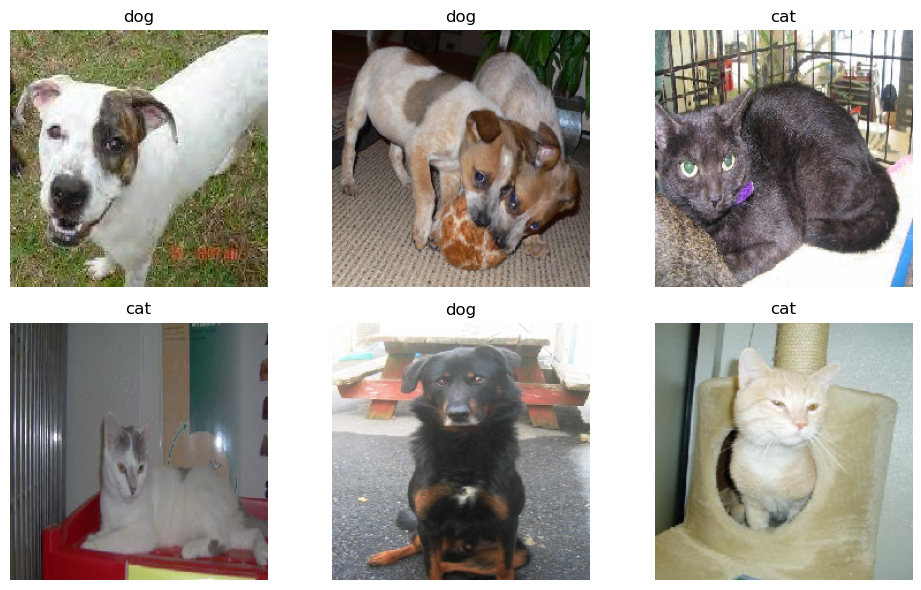

In [3]:
# 8. Récupérer un batch d'images et de labels depuis le train_generator pour affichage
images, labels = next(train_generator)

# 9. Création d'un mapping inverse (ex: 0 -> 'cat', 1 -> 'dog', 2 -> 'rabbit')
inv_label_map = {v: k for k, v in label_map.items()}

# 10. Afficher 6 images du batch avec leur label
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    predicted_label = np.argmax(labels[i])  # Récupère l'indice de la classe
    plt.title(inv_label_map[predicted_label])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
IMG_SIZE = 128

def load_images_from_directory(local_data_dir, label_map):
    """
    Parcourt local_data_dir (qui contient 'cat', 'dog', 'rabbit'),
    et retourne une liste de dictionnaires : 
    [{'image_path': ..., 'label': ...}, ...]
    """
    data_list = []
    for label_str, label_idx in label_map.items():
        folder_path = os.path.join(local_data_dir, label_str)
        if not os.path.isdir(folder_path):
            # Si le dossier n'existe pas, on passe
            continue
        
        # Parcourt tous les fichiers du sous-dossier (images)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # On vérifie qu'il s'agit bien d'un fichier (pas d'un sous-répertoire)
            if os.path.isfile(file_path):
                data_list.append({
                    'image_path': file_path,
                    'label': label_idx
                })
    return data_list

def split_data(data_list, test_ratio=0.2):
    """
    Sépare la liste de données en partie train (80%) et test (20% par défaut).
    Renvoie un dictionnaire : {'train': [...], 'test': [...]}
    """
    random.shuffle(data_list)
    split_index = int(len(data_list) * (1 - test_ratio))
    train_data = data_list[:split_index]
    test_data  = data_list[split_index:]
    
    return {
        'train': train_data,
        'test':  test_data
    }

def prepare_data(data_subset, img_size=128):
    """
    Convertit une liste [{'image_path': ..., 'label': ...}] 
    en tableaux NumPy (X, y) prêts à l'emploi.
    - X : (N, img_size, img_size, 3)
    - y : (N, 3) (si 3 classes)
    """
    X, y = [], []
    
    for item in data_subset:
        try:
            # Ouvrir l'image, la convertir en RGB, la redimensionner
            img = Image.open(item['image_path']).convert('RGB').resize((img_size, img_size))
            img_array = np.array(img) / 255.0  # Normaliser [0..1]

            # Vérifier la forme (img_size, img_size, 3)
            if img_array.shape == (img_size, img_size, 3):
                X.append(img_array)
                y.append(item['label'])
        except Exception as e:
            # En cas de problème de lecture, on ignore
            continue
    
    X = np.array(X)
    y = to_categorical(y, num_classes=len(label_map))
    return X, y

# 1) Charger toutes les images depuis le dossier local
all_data = load_images_from_directory(local_data_dir, label_map)

# 2) Séparer en train/test (80% / 20%)
dataset = split_data(all_data, test_ratio=0.2)

# 3) Préparer les tensors NumPy pour train et test
X_train, y_train = prepare_data(dataset['train'], img_size=IMG_SIZE)
X_test,  y_test  = prepare_data(dataset['test'],  img_size=IMG_SIZE)

# 4) Afficher les dimensions
print("✅ Données prêtes :")
print(" - X_train:", X_train.shape, "| y_train:", y_train.shape)
print(" - X_test :", X_test.shape,  "| y_test :", y_test.shape)
# À ce stade, vous pouvez entraîner votre modèle sur X_train, y_train
# et évaluer sur X_test, y_test.

✅ Données prêtes :
 - X_train: (0,) | y_train: (0, 3)
 - X_test : (0,) | y_test : (0, 3)


In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# 3) Générateurs pour l'entraînement et la validation
train_gen = datagen.flow_from_directory(
    directory=local_data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)
val_gen = datagen.flow_from_directory(
    directory=local_data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Define your image size, for example 224.
IMG_SIZE = 224

# Build model using an Input layer
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,819 (49.36 MB)

 Trainable params: 12,938,819 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
target_acc = 0.80  # Seuil de précision désiré (90%)
epoch = 0

while True:
    epoch += 1
    print(f"\n=== Époque {epoch} ===")
    
    # Entraîner le modèle pour 1 époque
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=1,
        verbose=1
    )
    
    # Récupérer la précision de validation
    val_acc = history.history['val_accuracy'][-1]
    print(f"Précision de validation à l'époque {epoch} : {val_acc:.2f}")
    
    # Arrêter l'entraînement si la précision de validation atteint ou dépasse le seuil
    if val_acc >= target_acc:
        print(f"\nLa précision de validation a atteint {val_acc:.2f} (>= {target_acc}), arrêt de l'entraînement à l'époque {epoch}.")
        break



=== Époque 1 ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.6332 - loss: 0.7949 - val_accuracy: 0.6444 - val_loss: 0.8325
Précision de validation à l'époque 1 : 0.64

=== Époque 2 ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.6013 - loss: 0.8050 - val_accuracy: 0.6333 - val_loss: 0.8007
Précision de validation à l'époque 2 : 0.63

=== Époque 3 ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.6045 - loss: 0.7859 - val_accuracy: 0.6056 - val_loss: 0.7854
Précision de validation à l'époque 3 : 0.61

=== Époque 4 ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 261ms/step - accuracy: 0.6351 - loss: 0.7765 - val_accuracy: 0.5833 - val_loss: 0.8443
Précision de validation à l'époque 4 : 0.58

=== Époque 5 ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.6091 - loss: 0.7820 - val_accuracy: 0.6167 - val_loss: 0.7854
Précision de validation à l'époque 5 : 0.62

=== Époque 6 ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.6383 - loss: 0.7523 - val_accura

In [86]:
# Évaluation sur le générateur de validation
loss, acc = model.evaluate(val_gen, verbose=1)
print(f"🔍   Précision finale sur val_gen : {acc*100:.2f}% – Loss : {loss:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.7682 - loss: 0.6948
🔍   Précision finale sur val_gen : 78.33% – Loss : 0.6061


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
              precision    recall  f1-score   support

         cat       0.66      0.80      0.72        60
         dog       0.79      0.57      0.66        60
      rabbit       0.88      0.93      0.90        60

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.76       180
weighted avg       0.77      0.77      0.76       180



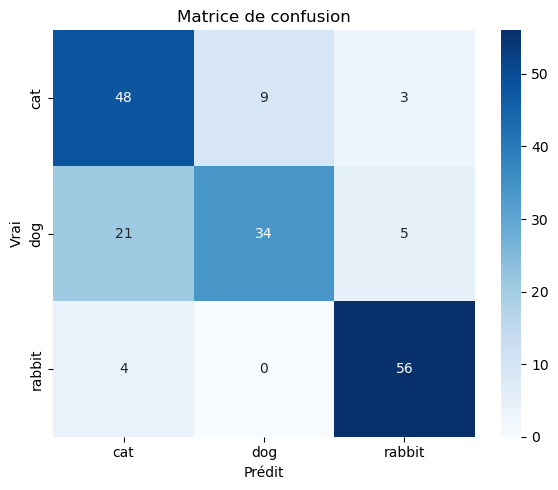

In [80]:
# 2.1 Prédictions
y_prob = model.predict(val_gen)
y_pred = np.argmax(y_prob, axis=1)

# 2.2 Véritables labels
y_true = val_gen.classes

# 2.3 Noms de classes dans l’ordre
class_names = list(val_gen.class_indices.keys())

# 2.4 Rapport de classification
print(classification_report(y_true, y_pred, target_names=class_names))

# 2.5 Matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion")
plt.tight_layout()
plt.show()


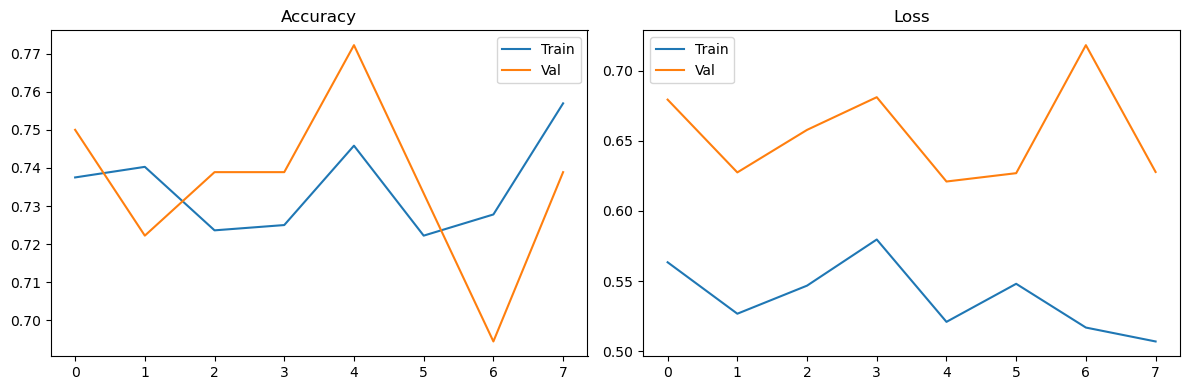

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.7063 - loss: 0.7320
Test accuracy: 72.22%


In [78]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Val")
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# 🔍 Évaluation sur jeu de test
# Evaluate using the validation/test generator (which has the correct image size)
loss, acc = model.evaluate(val_gen)
print(f"Test accuracy: {acc*100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


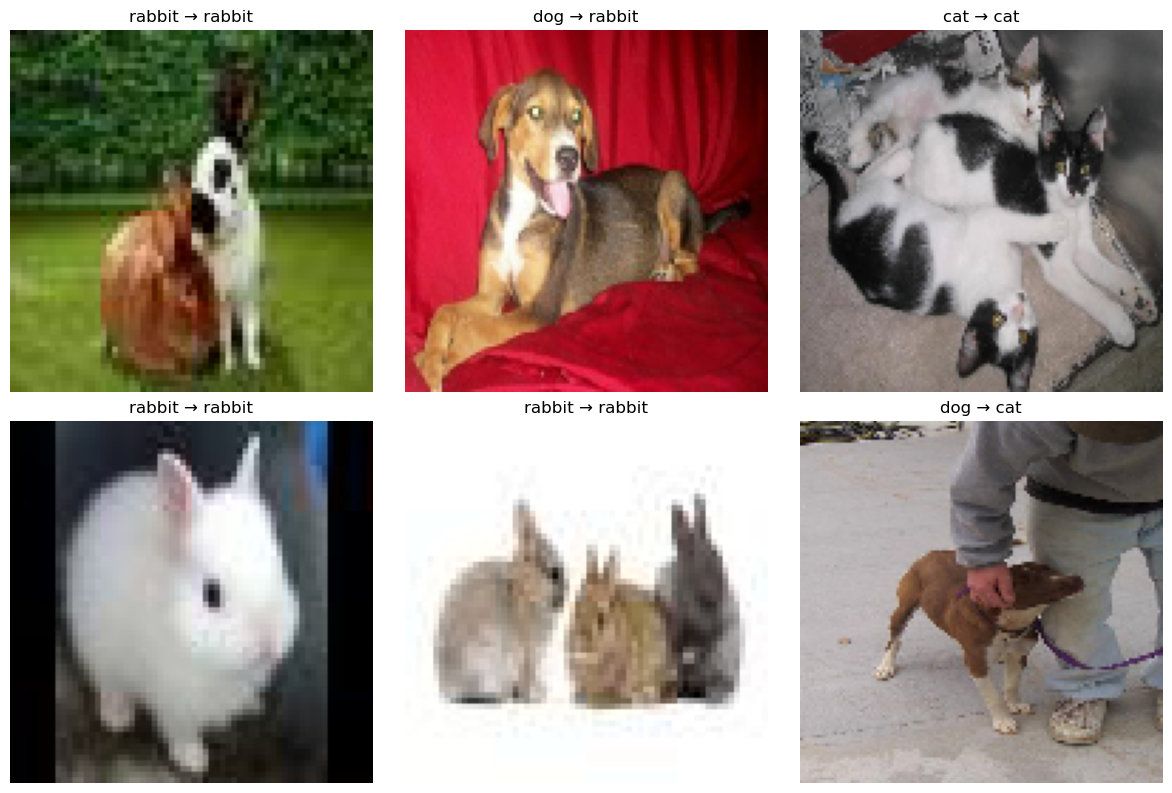

In [74]:
# 1) Prédictions et vrais labels
y_prob = model.predict(val_gen)
y_pred = np.argmax(y_prob, axis=1)
y_true = val_gen.classes

# 2) Inverse mapping idx→label
inv_label_map = {v: k for k, v in val_gen.class_indices.items()}

# 3) Indices corrects / incorrects
correct_idxs = np.where(y_true == y_pred)[0]
wrong_idxs   = np.where(y_true != y_pred)[0]

# 4) Choix d’un petit échantillon
n_correct = 4
n_wrong   = 2

# Si vous n’avez pas assez d’exemples, on ajuste
n_correct = min(n_correct, len(correct_idxs))
n_wrong   = min(n_wrong,   len(wrong_idxs))

sel_correct = np.random.choice(correct_idxs, n_correct, replace=False)
sel_wrong   = np.random.choice(wrong_idxs,   n_wrong,   replace=False)

# 5) On les combine et mélange
sel_idxs = np.concatenate([sel_correct, sel_wrong])
np.random.shuffle(sel_idxs)

# 6) Affichage en grille
total = len(sel_idxs)
cols  = 3
rows  = int(np.ceil(total/cols))

plt.figure(figsize=(4*cols, 4*rows))

for i, idx in enumerate(sel_idxs):
    img_path = os.path.join(val_gen.directory, val_gen.filenames[idx])
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    true_lbl = inv_label_map[y_true[idx]]
    pred_lbl = inv_label_map[y_pred[idx]]
    plt.title(f"{true_lbl} → {pred_lbl}")
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


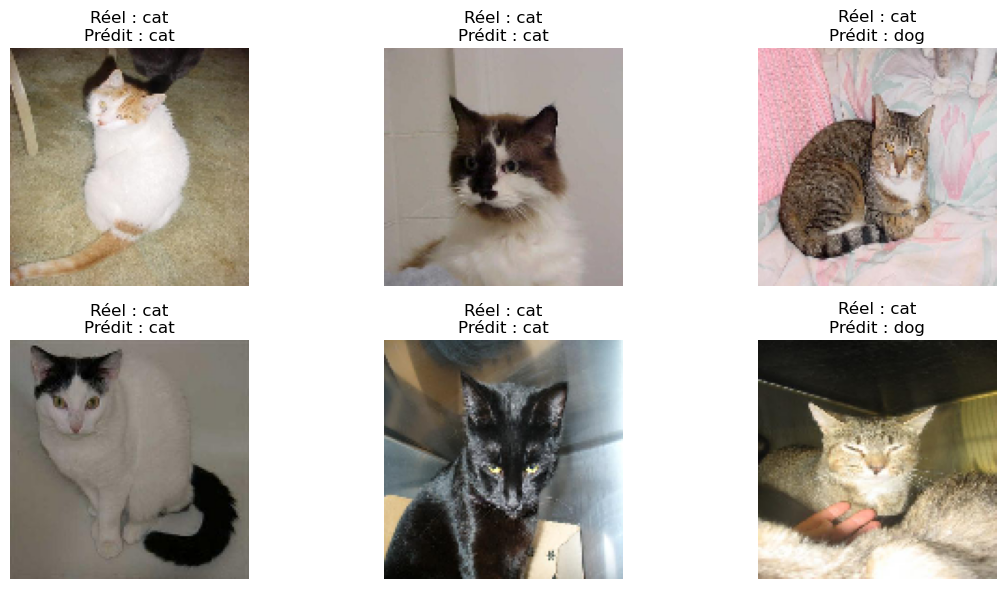

In [84]:

# Inversion map int → label
inv_label_map = {v:k for k,v in val_gen.class_indices.items()}

plt.figure(figsize=(12, 6))

for i in range(6):
    # 1) index aléatoire
    idx = random.randint(0, val_gen.samples - 1)
    
    # 2) chemin complet de l’image
    img_path = os.path.join(val_gen.directory, val_gen.filenames[idx])
    
    # 3) chargement + affichage
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    
    # 4) vrai label
    true_idx = val_gen.classes[idx]
    true_label = inv_label_map[true_idx]
    
    # 5) prédiction
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, 0)
    pred_idx = np.argmax(model.predict(x), axis=1)[0]
    pred_label = inv_label_map[pred_idx]
    
    plt.title(f"Réel : {true_label}\nPrédit : {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [96]:
model.save("cnn_animals_model.h5")

<p style="font-family:Bahnschrift Condensed; font-size:120%; text-align:left;">
La commande <code>model.save("cnn_animals_model.h5")</code> permet de sérialiser l’architecture du réseau, les poids entraînés et l’état de l’optimiseur dans un fichier HDF5 nommé <strong>cnn_animals_model.h5</strong>. Ce fichier unique rend le modèle reproductible et facilement déployable : vous pouvez le recharger ultérieurement avec <code>tf.keras.models.load_model("cnn_animals_model.h5")</code> pour effectuer des prédictions ou poursuivre l’entraînement sans redéfinir la structure ou recharger manuellement les poids.
</p>


In [145]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import gradio as gr

# 1) Charger le modèle sans métriques pour éviter le warning
MODEL_PATH = "cnn_animals_model.h5"
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# 2) Si vous avez besoin des métriques (optionnel), vous pouvez ensuite recompiler :
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3) Mapping des classes
IMG_SIZE = 224
label_map = {0: "cat", 1: "dog", 2: "rabbit"}

# 4) Fonction de prédiction
def classify_image(image_file):
    img = Image.open(image_file).convert("RGB").resize((IMG_SIZE, IMG_SIZE))
    arr = np.array(img) / 255.0
    preds = model.predict(np.expand_dims(arr, axis=0))[0]
    return { label_map[i]: float(preds[i]) for i in range(len(preds)) }

# 5) Construction de l’interface Gradio
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="filepath", label="Image d'animal"),
    outputs=gr.Label(num_top_classes=3, label="Probabilités par classe"),
    title="Animal Classifier",
    description="Upload an image of a dog, cat or rabbit and let the model classify it.",
    flagging_mode="never"
)

if __name__ == "__main__":
    # 6) show_error=True pour voir la stacktrace, share=True pour un lien public
    iface.launch(show_error=True, share=True)

* Running on local URL:  http://127.0.0.1:7875
* Running on public URL: https://5cfa268cce1fbab240.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
